 **Paso 1: Cargar el dataset**

In [10]:
import pandas as pd

data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


 **Paso 2: Exploración del dataset**

In [13]:
print("Información del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None

Estadísticas descriptivas:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016

 **Paso 3: Visualización de los datos**

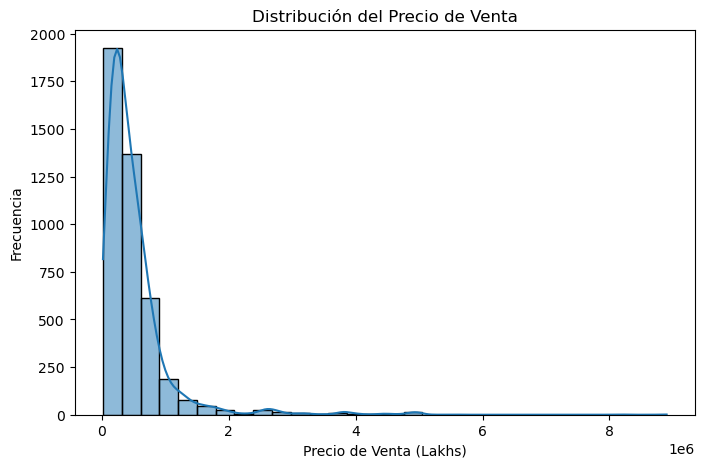

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['selling_price'], bins=30, kde=True)
plt.title("Distribución del Precio de Venta")
plt.xlabel("Precio de Venta (Lakhs)")
plt.ylabel("Frecuencia")
plt.show()

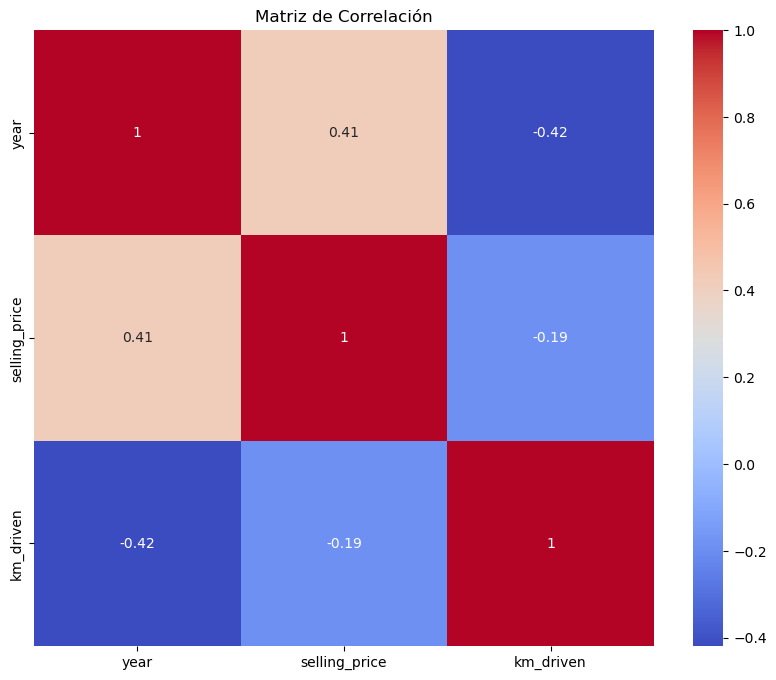

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

 **Paso 4: Preprocesamiento de datos**

In [19]:
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

df = data.copy()
label_enc = LabelEncoder()

df['fuel'] = label_enc.fit_transform(df['fuel'])
df['seller_type'] = label_enc.fit_transform(df['seller_type'])
df['transmission'] = label_enc.fit_transform(df['transmission'])
df['owner'] = label_enc.fit_transform(df['owner']) 

 **Paso 5: Selección de características y variable objetivo**

In [22]:
X = df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
y = df['selling_price']

 **Paso 6: División en conjunto de entrenamiento y prueba**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 **Paso 7: Entrenamiento del modelo de regresión lineal**

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

 **Paso 8: Evaluación del modelo**

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Métricas de Evaluación:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R^2 (Coeficiente de Determinación): {r2:.2f}")

Métricas de Evaluación:
MAE (Error Absoluto Medio): 222188.94
MSE (Error Cuadrático Medio): 184963450105.74
RMSE (Raíz del Error Cuadrático Medio): 430073.77
R^2 (Coeficiente de Determinación): 0.39


 **Paso 9: Visualización de resultados**

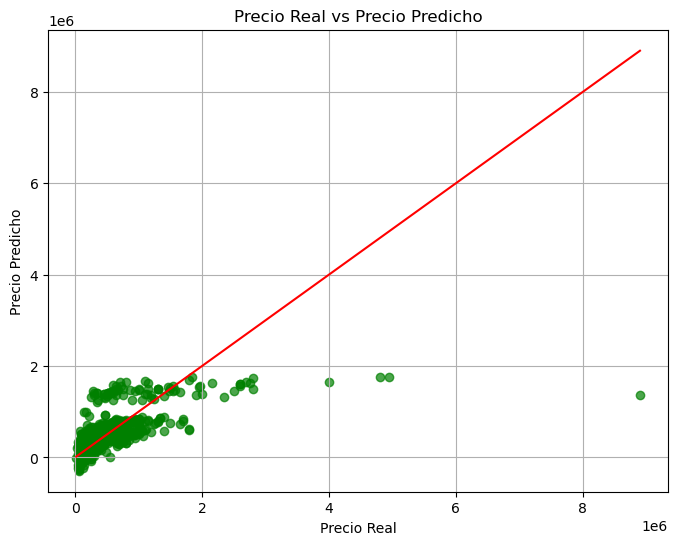

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precio Real vs Precio Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

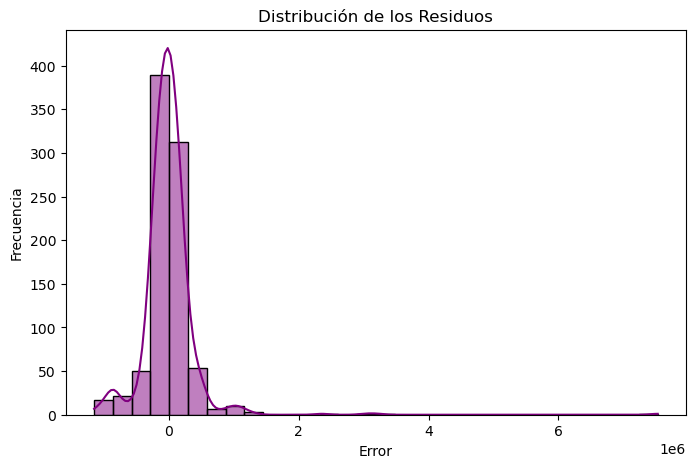

In [40]:
residuos = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuos, bins=30, kde=True, color='purple')
plt.title("Distribución de los Residuos")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

 **Paso 10: Interpretación de resultados**

### Análisis del Dataset

- El conjunto de datos está compuesto por **4340 registros de vehículos**.
- El **modelo más antiguo** en el dataset es del **año 1992**, mientras que el más reciente es de **2020**.
- No se encontraron **valores nulos**, lo cual facilita mucho el proceso de análisis y modelado.
- Se incluyen variables como el tipo de combustible, el tipo de vendedor, la transmisión y el número de dueños anteriores (`owner`).

---

### Interpretación de las gráficas

#### 1. Distribución del Precio de Venta

- La distribución del precio presenta un **sesgo a la derecha**.
- La mayoría de los autos se venden entre **0 y 1 lakh**, lo que sugiere un mercado con predominio de vehículos **económicos**.
- Existen algunos casos con precios superiores a **9 lakhs**, pero son poco frecuentes y probablemente corresponden a **vehículos de lujo o modelos recientes**.

#### 2. Matriz de Correlación

- Algunas relaciones importantes observadas fueron:
  - `year` tiene una **correlación positiva moderada (0.41)** con el `selling_price`, lo que indica que los vehículos más nuevos suelen venderse a precios más altos.
  - `km_driven` muestra una **correlación negativa débil (-0.19)** con el precio, lo que implica que un mayor kilometraje tiende a reducir el valor del vehículo.
  - `year` y `km_driven` están negativamente correlacionados **(-0.42)**, como es de esperarse: autos más nuevos suelen tener menos kilometraje.

#### 3. Gráfica de Precio Real vs Predicho

- La mayoría de los puntos se encuentran **por debajo de la línea de referencia**, lo que indica que el modelo **tiende a subestimar el precio real**.
- El modelo muestra buena precisión en el rango de precios **bajos (0–2 lakhs)**, pero tiene errores más altos en autos caros (**4M–8M**).
- Esto podría deberse a una **escasa representación de vehículos costosos** en los datos de entrenamiento.

#### 4. Distribución de los Residuos (Errores)

- Los residuos están **agrupados alrededor de cero**, lo que es deseable.
- La distribución tiene un **ligero sesgo positivo**, lo que refuerza la idea de que el modelo **subestima algunos precios**.
- Se detectan algunos **outliers** (errores altos), que pueden deberse a vehículos con características no consideradas en el modelo.

---

### Evaluación del Modelo

- **MAE (Error Absoluto Medio)**: **222,188.94**  
  > En promedio, el modelo comete un error de más de **2 lakhs**, lo cual es moderado, pero puede mejorarse.

- **MSE (Error Cuadrático Medio)**: **184,963,450,105.74**  
  > Penaliza más los errores grandes; su valor elevado confirma la existencia de predicciones con errores altos.

- **RMSE (Raíz del Error Cuadrático Medio)**: **430,073.77**  
  > Refleja que los errores típicos del modelo están por encima de **4 lakhs**, especialmente en vehículos costosos.

- **R² (Coeficiente de Determinación)**: **0.39**  
  > El modelo explica solo el **39% de la variabilidad del precio**, indicando que aún se puede mejorar significativamente.

---